#1.Preliminary Steps 


1. Set up a jupyter notebook 
2. Upload the dataset 
3. Select the variables shown in the table above




In [ ]:
# Load the libraries and dataset
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('LoanStats.csv')
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


#2. Data Understanding 
1. Analyze the variables in dataset selected

In [ ]:
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [ ]:
df.tail()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
39781,8.07,2500,36,A,MORTGAGE,110000.0,home_improvement
39782,10.28,8500,36,C,RENT,18000.0,credit_card
39783,8.07,5000,36,A,MORTGAGE,100000.0,debt_consolidation
39784,7.43,5000,36,A,MORTGAGE,200000.0,other
39785,13.75,7500,36,E,OWN,22000.0,debt_consolidation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


Put dataset into dateframe

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.shape

(39786, 7)

After checking missing value, there is no missing value in dataset

In [ ]:
print("Missing values distribution: ",df.isnull().mean())
print("")

Missing values distribution:  int_rate          0.0
loan_amnt         0.0
term              0.0
grade             0.0
home_ownership    0.0
annual_inc        0.0
purpose           0.0
dtype: float64



In [ ]:
df.isna().sum()

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

Checking variable by grouping with different catagorical variable

In [ ]:
df.groupby(by="home_ownership").mean()


,int_rate,loan_amnt,term,annual_inc
home_ownership,,,,
MORTGAGE,11.781852,12709.060611,43.727504,83112.599411
NONE,8.696667,5600.000000,36.000000,80733.333333
OTHER,12.040918,10663.010204,36.244898,71309.714286
OWN,11.773965,10269.973890,41.976501,58878.603153
RENT,12.299678,10008.110001,41.361243,57375.209350


In [ ]:
df.groupby(by="purpose").mean()

,int_rate,loan_amnt,term,annual_inc
purpose,,,,
car,10.538040,6775.483559,44.711799,61810.946834
credit_card,11.708955,11737.215301,40.886899,70467.936379
debt_consolidation,12.493888,12707.583262,43.125723,67319.200575
educational,11.650831,6810.461538,37.181538,53471.374092
home_improvement,11.412168,11553.174204,43.284422,89781.463317
house,12.248246,13128.403141,43.664921,77105.340733
major_purchase,10.847637,8160.843236,41.089580,66388.601732
medical,11.499309,8311.834532,41.766906,68276.596532
moving,11.563619,6650.171527,40.116638,61801.578302


In [ ]:
df["purpose"].value_counts()

debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [ ]:
df["home_ownership"].value_counts()

RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

1. Mortgage has the highest ratios 
2. Grade B has highest value counts but G is the lowest

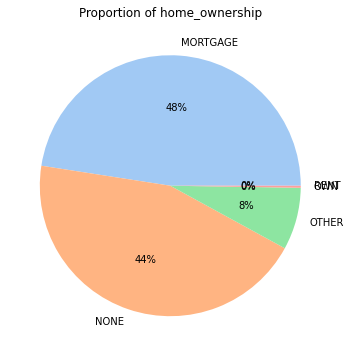

In [ ]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["home_ownership"].value_counts()
#Define labels
labels = ["MORTGAGE","NONE","OTHER","OWN","RENT"]
#Define color palette
colors = sns.color_palette('pastel')
#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of home_ownership")
plt.show()

B    12035
A    10085
C     8111
D     5325
E     2858
F     1054
G      318
Name: grade, dtype: int64 



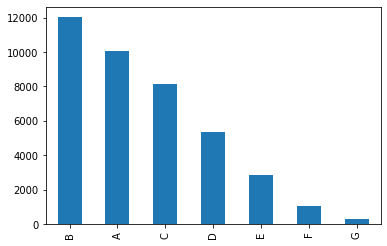

In [ ]:
df.grade.value_counts().plot.bar()
print(df.grade.value_counts(), '\n')

Frequency table
1. Term 36 is higher than 60 
2. purpose - debt consolidation is the highest
3. Housepwnership - Rent is slightly higher than mortgage

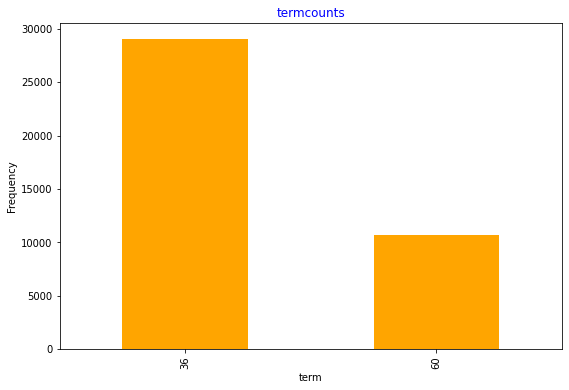

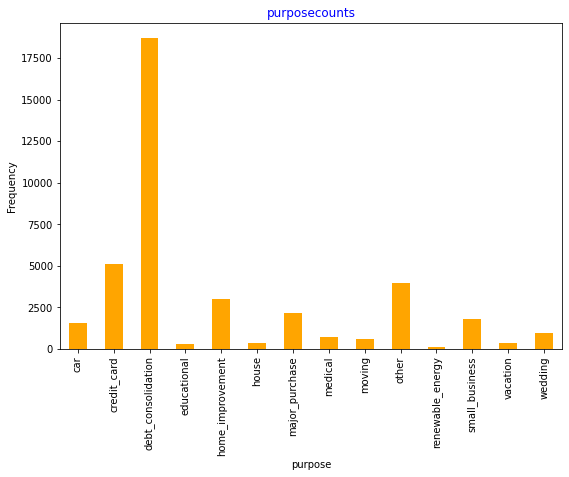

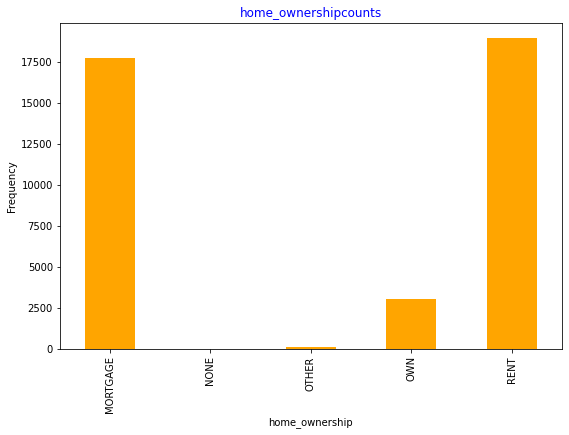

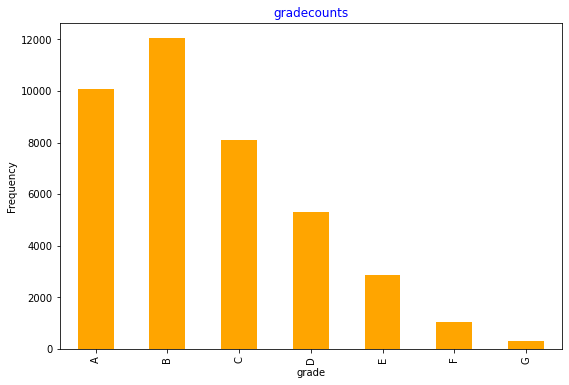

In [ ]:
categorical_features = ['term','purpose','home_ownership','grade']
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax,color= 'orange')
    ax.set_title(col + 'counts',color= 'blue')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Interest Rates 
   1. Range between 10-15 is the highest
   2. Range over 15 starts decreasing

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

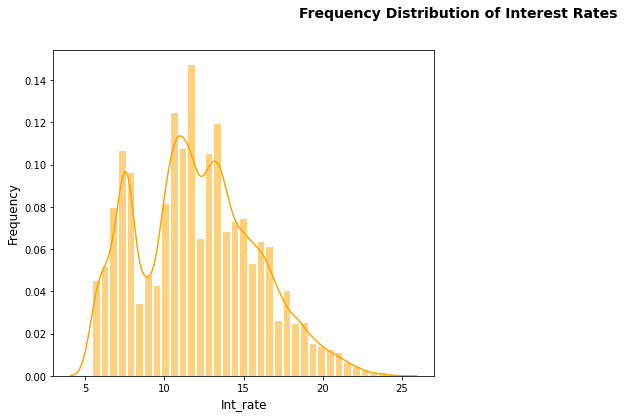

In [ ]:
#Frequency Distribution of Interest Rates
plt.figure(figsize=(15,6))
plt.suptitle('Frequency Distribution of Interest Rates', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(df['int_rate'], color="orange", label="No.Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.xlabel("Int_rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

Frequency Loan amount  
 1. Loan amount is the highest between range 5000-10000 
 2. starts decreasing after 10000

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

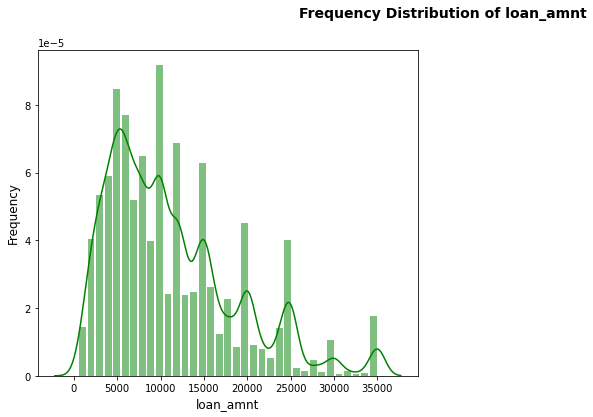

In [ ]:
#Frequency Distribution of loan_amnt
plt.figure(figsize=(15,6))
plt.suptitle('Frequency Distribution of loan_amnt', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(df['loan_amnt'], color="Green", label="No.Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})

plt.xlabel("loan_amnt", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [ ]:
df["term"].value_counts()

36    29096
60    10690
Name: term, dtype: int64

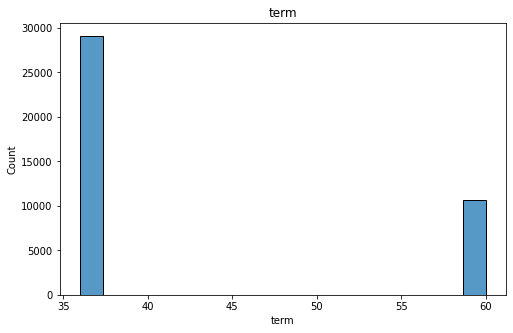

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="term")
plt.title("term")
plt.show()


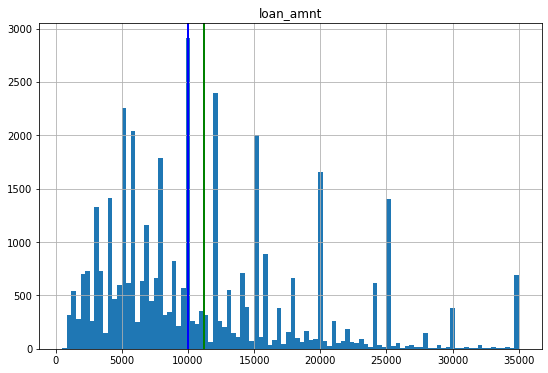

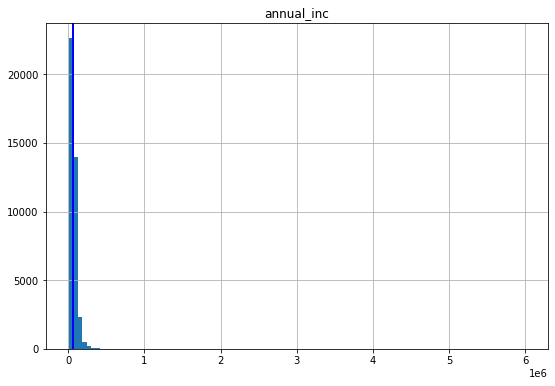

In [ ]:
numeric_features=['loan_amnt','annual_inc']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='green', linewidth=2)
    ax.axvline(feature.median(), color='blue',linewidth=2)
    ax.set_title(col)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

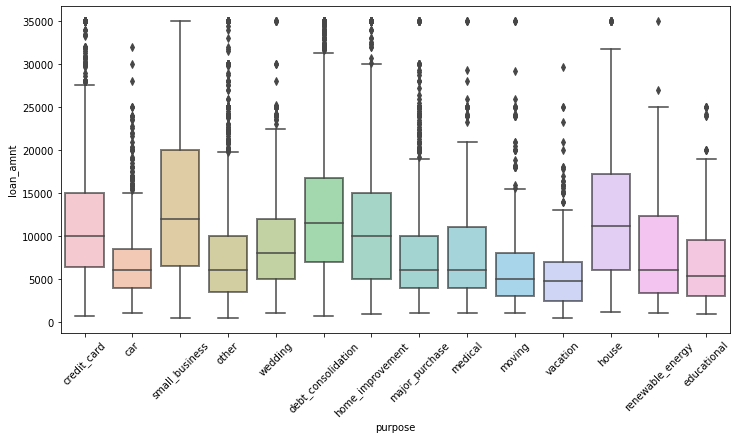

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='purpose', y='loan_amnt', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

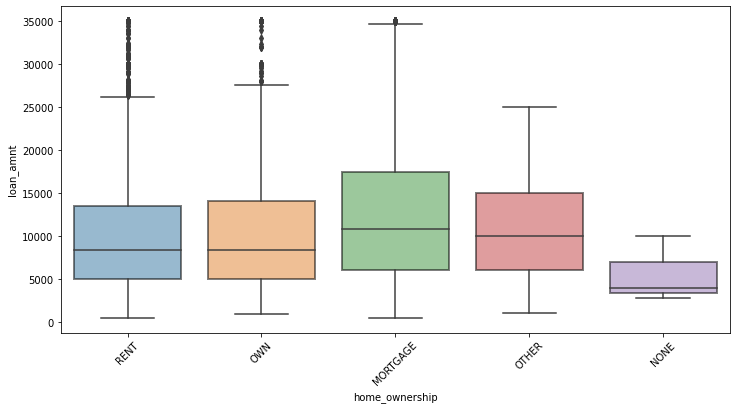

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='home_ownership', y='loan_amnt', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

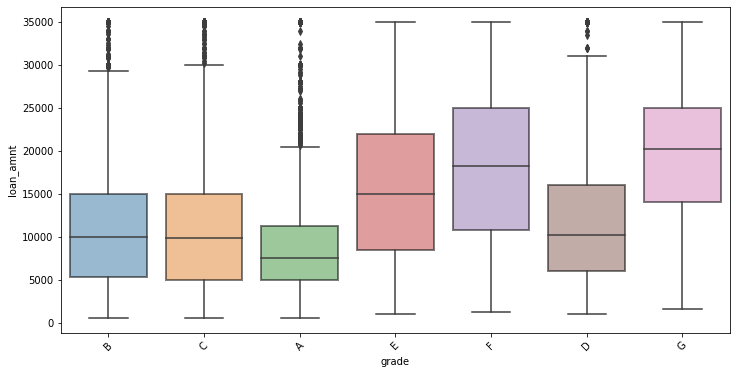

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

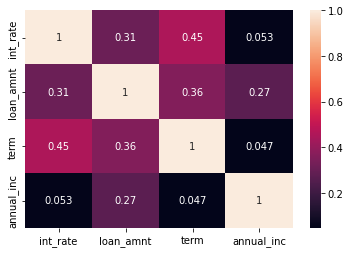

In [ ]:
sns.heatmap(df.corr(),annot=True)

#3. Data Preparation
1. Missing Values
2. Transformation of all categorical variables
3. Split into Test and Training Dataset

In [ ]:
scaler = MinMaxScaler()
df[['loan_amnt', 'annual_inc']] = scaler.fit_transform(df[['loan_amnt', 'annual_inc']])

In [ ]:
df['term'] = df.term.astype('category')
df['term']  =  df['term'].cat.codes
df['grade'] = df.grade.astype('category')
df['grade']  =  df['grade'].cat.codes
df['home_ownership'] = df.home_ownership.astype('category')
df['home_ownership']  =  df['home_ownership'].cat.codes
df['purpose'] = df.purpose.astype('category')
df['purpose']  =  df['purpose'].cat.codes

In [ ]:
X, y = df[['loan_amnt','term','grade','home_ownership','annual_inc','purpose']].values, df['int_rate'].values
print('Features:',X[:6], '\nLabels:', y[:6], sep='\n')

Features:
[[1.30434783e-01 0.00000000e+00 1.00000000e+00 4.00000000e+00
  3.33555704e-03 1.00000000e+00]
 [5.79710145e-02 1.00000000e+00 2.00000000e+00 4.00000000e+00
  4.33622415e-03 0.00000000e+00]
 [5.50724638e-02 0.00000000e+00 2.00000000e+00 4.00000000e+00
  1.37625083e-03 1.10000000e+01]
 [2.75362319e-01 0.00000000e+00 2.00000000e+00 4.00000000e+00
  7.53835891e-03 9.00000000e+00]
 [7.24637681e-02 1.00000000e+00 1.00000000e+00 4.00000000e+00
  1.26751167e-02 9.00000000e+00]
 [1.30434783e-01 0.00000000e+00 0.00000000e+00 4.00000000e+00
  5.33689126e-03 1.30000000e+01]]

Labels:
[10.65 15.27 15.96 13.49 12.69  7.9 ]


# Modeling

### Split data 70%-30% into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training dataset: %d \nTest dataset: %d ' % (X_train.shape[0], X_test.shape[0]))

Training dataset: 27850 
Test dataset: 11936 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
x = df.drop(columns = ['int_rate','loan_amnt','annual_inc'])
y = df['int_rate'] #Target Variable

In [ ]:
print(x.shape, y.shape) 

(39786, 4) (39786,)


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
y = y.reshape(-1,1)
y.shape

(39786, 1)

In [ ]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("Training set score: {:.7f}".format(model_lr.score(X_train, y_train)))
print("Test set score: {:.7f}".format(model_lr.score(X_test, y_test)))
print("RMSE: {:.7f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Training set score: 0.9026954
Test set score: 0.9051174
RMSE: 1.1442117


####'loan_amnt','term','grade','home_ownership','annual_inc','purpose'

In [ ]:

model_lr.coef_

array([ 0.5129885 ,  0.4048864 ,  2.46164721,  0.04784491, -1.33065641,
       -0.0062949 ])

In [ ]:
def calculate_residuals(model, features, label):
    predictions = model_lr.predict(features)
    df_result = pd.DataFrame({'Actual':label, 'Predicted':predictions})
    df_result['Residuals'] = abs(df_result['Actual']) - abs(df_result['Predicted'])
    return df_result

In [ ]:
def linear_assumption(model, features, label):
    df_result = calculate_residuals(model, features, label)
    fig1, ax1 = plt.subplots(figsize=(12,8))
    ax1 = sns.regplot(x='Actual', y='Predicted', data=df_result, color='steelblue')
    line_coords = np.arange(df_result.min().min(), df_result.max().max())
    ax1 = plt.plot(line_coords, line_coords,  # X and y points
              color='indianred')

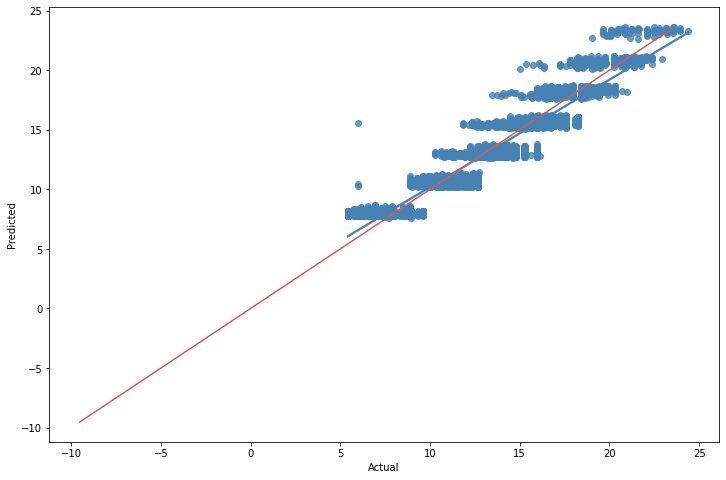

In [ ]:
linear_assumption(model_lr, X_test, y_test)

####Residual Plot

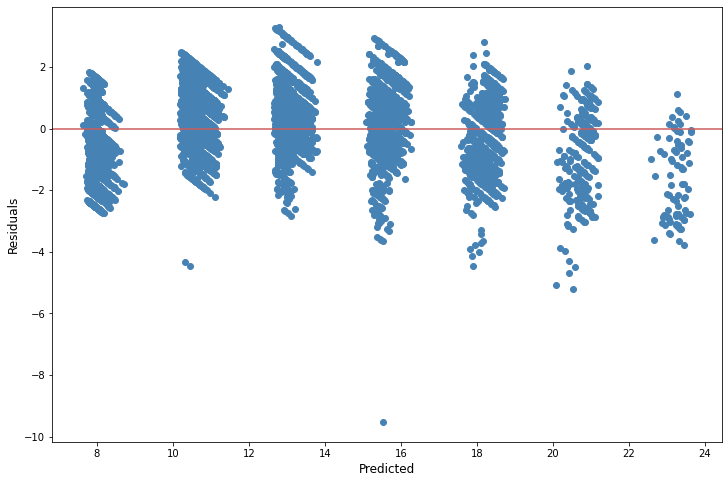

In [ ]:
#Residual Plot
df_result = calculate_residuals(model_lr, X_test, y_test)
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.scatter(x=df_result['Predicted'], y=df_result['Residuals'], color='steelblue')
plt.axhline(y=0, color='indianred')
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)
plt.show()

###Achieved an Accuracy of 90% on the testing data using a Multiple Linear Regression Model

In [ ]:
accuracy_lr = model_lr.score(X_test, y_test)
print(accuracy_lr)

0.9051173539659791


####Achieved an Accuracy of 80% on the testing data using a DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dr_model = DecisionTreeRegressor() #Instantiate an object 
dr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
accuracy_dr = dr_model.score(X_test, y_test)
accuracy_dr

0.8553305123367748

chieved an Accuracy of 91% on the testing data using a RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=75, max_depth=25) #Instantiate an object 

#Try Experimenting with this n_estimators and max_depth parameters

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=75)

In [ ]:
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_rf

0.9164787847541169

Hyperparameter Tuning / Grid Search 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

Best parameter combination: {'learning_rate': 0.2, 'n_estimators': 40} 

GradientBoostingRegressor(learning_rate=0.2, n_estimators=40) 

MSE: 0.9889450047138668
RMSE: 0.9944571407123923
R2: 0.9283285493226082


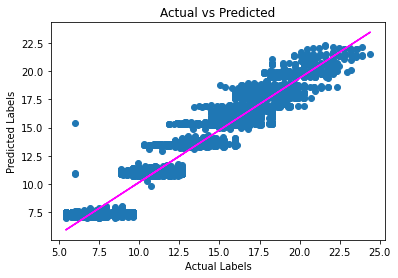

Training Score for   92.83
Testing Score for  92.83


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


# Use a Gradient Boosting algorithm with different hyperparameters
alg = [
     [{
         #hyperpamaters choosen: learning_rate and n_estimators
 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
  'n_estimators' : [5,10,15,20,25,30,35,40,45,50]
 }, GradientBoostingRegressor()]


              ]

for params,alg in alg:
  # Find the best hyperparameter combination to optimize the R2 metric
  score = make_scorer(r2_score)
  gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
  gridsearch.fit(X_train, y_train)
  print("Best parameter combination:", gridsearch.best_params_, "\n")

  # Get the best model
  model=gridsearch.best_estimator_
  print(model, "\n")

  # Evaluate the model using the test data
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  print("MSE:", mse)
  rmse = np.sqrt(mse)
  print("RMSE:", rmse)
  r2 = r2_score(y_test, predictions)
  print("R2:", r2)

  # Plot predicted vs actual
  plt.scatter(y_test, predictions)
  plt.xlabel('Actual Labels')
  plt.ylabel('Predicted Labels')
  plt.title('Actual vs Predicted')
  # overlay the regression line
  z = np.polyfit(y_test, predictions, 1)
  p = np.poly1d(z)
  plt.plot(y_test,p(y_test), color='magenta')
  plt.show()
  
#Control for overfitting: campare training and test datasets
  clf=model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
    
  print(f'Training Score for   {clf.score(X_train,y_train) * 100:.2f}' )
  print(f'Testing Score for  {clf.score(X_test,y_test) * 100:.2f}' )

In [ ]:
%%shell
jupyter nbconvert --to html /content/Task2_Evaluated_Exercise_–_Part_II_SciKit_Stack.ipynb

[NbConvertApp] Converting notebook /content/Task2_Evaluated_Exercise_–_Part_II_SciKit_Stack.ipynb to html
[NbConvertApp] Writing 745632 bytes to /content/Task2_Evaluated_Exercise_–_Part_II_SciKit_Stack.html
